# Generate an ELG Catalogue From a Halo Catalogue

In [1]:
import time
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
path =  '/global/cscratch1/sd/jiaxi/master/catalog/0226_ELG_real/'

In [2]:
time_start=time.time()
from astropy.io import fits
halo = fits.open(path[:-14]+'halotest120.fits.gz')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.04204392433166504 s


Conclusion: fits wrting needs a certain amount of time, but fits file reading is extremly fast. However, since the input of the 2-point-correlation-function should be ascii data, so fits files should be converted back afterwards. 

In [5]:
a=np.arange(20)
print(a[::-1][5:5*2],a)

[14 13 12 11 10] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## ELG Catalogue Production

In [6]:
data = halo[1].data
vpeak = data['vpeak']
print(vpeak.shape)

(137413400,)


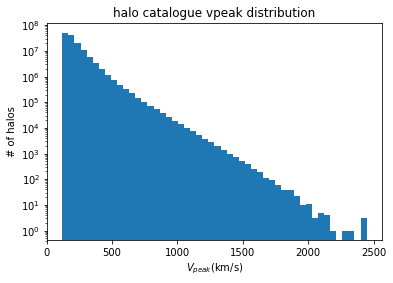

In [12]:
plt.xlabel('$V_{peak}$(km/s)')
plt.ylabel('# of halos')
plt.hist(vpeak,bins=50)#,range=(120,600))
plt.title('halo catalogue vpeak distribution')
plt.yscale('log');

In order to see the difference between the original catalogue and the scattered catalogue, we sort them by $V_{peak}$ and $V_{peak}^{scat}$, respectively. 

In [60]:
time_start=time.time()
sort_raw = data[data['vpeak'].argsort()]
LRGorg = sort_raw[::-1][1000:5468750+1000]
org_tmp = Table([LRGorg['X'],LRGorg['Y'],LRGorg['Z'],LRGorg['vx'],LRGorg['vy'],LRGorg['vz']], names=('x','y','z','vx','vy','vz'))
ascii.write(org_tmp,path+"ELGorg1000.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 156.72427368164062 s


In [ ]:
time_start=time.time()
LRGorg1 = sort_raw[::-1][10000:5468750+10000]
org_tmp1 = Table([LRGorg1['X'],LRGorg1['Y'],LRGorg1['Z'],LRGorg1['vx'],LRGorg1['vy'],LRGorg1['vz']], names=('x','y','z','vx','vy','vz'))
ascii.write(org_tmp1,path+"ELGorg10000.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

For the scattered version, the $V_{peak}^{scat}=(1+N(0,\sigma_{HAM}))V_{peak}$ where we take scatter width $\sigma_{HAM}=0.31$ from S. Rodríguez-Torres et al. (2016). Our pre-processing step keep haloes with $V_{peak}>120 km/s$. In principle, we should make sure that the haloes with the smallest $V_{peak}^{crit}\approx 120km/s$ could hardly be scattered to the range where they can have a galaxy inside, i.e., $V_{peak}^{scat,crit}>400km/s$. It means that $V_{peak}^{scat,crit}>(1+5\sigma_{HAM})V_{peak}^{crit}$. Here $400km/s>(1+5*0.31)*120km/s$, the thresholds and $\sigma_{HAM}$ values are satisfactory.

The process above ensures that a low mass halo is possible to have a ELG. But we also need a process to reject some heavy haloes that quench star-forming process. So the simplest way is to pick out haloes with sorted $V_{peak}^{scat}$ from somewhere in the middle instead of the heaviest one.

In [20]:
np.random.seed(0)
time_start=time.time()
datac = np.copy(data)
datac['vpeak'] *= 1+np.random.normal(scale=0.2,size=len(datac['vpeak']))
sort_scat = datac[datac['vpeak'].argsort()]
sort_scatadd = data['vpeak'][datac['vpeak'].argsort()]
LRGscat = sort_scat[::-1][1000:5468750+1000]
scatorg = sort_scatadd[::-1][1000:5468750+1000]
scat_tmp = Table([LRGscat['X'],LRGscat['Y'],LRGscat['Z'],LRGscat['vx'],LRGscat['vy'],LRGscat['vz']], names=('x','y','z','vx','vy','vz'))
ascii.write(scat_tmp,path+"ELGscat1000.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 186.47128343582153 s


In [21]:
np.random.seed(0)
time_start=time.time()
datac1 = np.copy(data)
datac1['vpeak'] *= 1+np.random.normal(scale=0.2,size=len(datac1['vpeak']))
sort_scat1 = datac1[datac1['vpeak'].argsort()]
LRGscat1 = sort_scat1[::-1][10000:5468750+10000]
sort_scatadd1 = data['vpeak'][datac1['vpeak'].argsort()]
scatorg1 = sort_scatadd1[::-1][10000:5468750+10000]
scat_tmp1 = Table([LRGscat1['X'],LRGscat1['Y'],LRGscat1['Z'],LRGscat1['vx'],LRGscat1['vy'],LRGscat1['vz']], names=('x','y','z','vx','vy','vz'))
ascii.write(scat_tmp1,path+"ELGscat100002.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 186.71424317359924 s


In [27]:
np.random.seed(0)
time_start=time.time()
datac2 = np.copy(data)
datac2['vpeak'] *= 1+np.random.normal(scale=0.3,size=len(datac2['vpeak']))
sort_scat2 = datac2[datac2['vpeak'].argsort()]
# discard V_peak > v_1(=2000km/s)
# use the original v_peak and scatter again with \sigma_2
# sort and pick

LRGscat2 = sort_scat2[::-1][10000:5468750+10000]
sort_scatadd2 = data['vpeak'][datac2['vpeak'].argsort()]
scatorg2 = sort_scatadd2[::-1][10000:5468750+10000]
scat_tmp2 = Table([LRGscat2['X'],LRGscat2['Y'],LRGscat2['Z'],LRGscat2['vx'],LRGscat2['vy'],LRGscat2['vz']], names=('x','y','z','vx','vy','vz'))
ascii.write(scat_tmp2,path+"LRGscat100003.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 200.822252035141 s


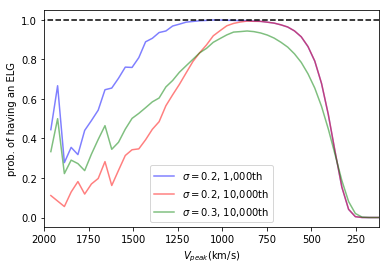

In [51]:
n,bins=np.histogram(vpeak,bins=50,range=(100,2000))
fig,ax=plt.subplots()

n0,bins0=np.histogram(scatorg,bins=50,range=(100,2000))
ax.plot(bins[:-1],n0/n,c='b',alpha=0.5,label='$\sigma=0.2$, 1,000th')

n1,bins1=np.histogram(scatorg1,bins=50,range=(100,2000))
ax.plot(bins[:-1],n1/n,c='r',alpha=0.5,label='$\sigma=0.2$, 10,000th')

n2,bins2=np.histogram(scatorg2,bins=50,range=(100,2000))
ax.plot(bins[:-1],n2/n,c='g',alpha=0.5,label='$\sigma=0.3$, 10,000th')

ax.set_xlabel('$V_{peak}$(km/s)')
ax.plot(np.linspace(120,2000,10),np.ones(10),'k--')
ax.set_xlim(2000,120)
plt.legend(loc=0)
ax.set_ylabel('prob. of having an ELG');
plt.savefig(path+'ELGmodel.png',bbox_tight=True)

The process to run the 2PCF code:
* change the parameters in fcfc.conf: DATA_CATALOG, DD_FILE, OUTPUT; DIST_BIN_RMIN, DIST_BIN_RMAX, DIST_BIN_RNUM; CF_MODE(when using observation)
* open an interactive node and `source setup.sh`
* `./2pcf`

If *.h files or *.c files are changed, make before source the environment(make c program executable)
* `make clean`
* `make`

## 2PCF Differece

In [71]:
cfpath =  '/global/cscratch1/sd/jiaxi/master/2PCFout/'+'0226_ELG_real/'
cfpath1 =  '/global/cscratch1/sd/jiaxi/master/2PCFout/'+'0211_LRG_real/'

In [72]:
from astropy.io import ascii
org = Table.read(cfpath+'ELGorg1000.dat',format="ascii")
org1 = Table.read(cfpath+'ELGorg10000.dat',format="ascii")
scat= Table.read(cfpath+'ELGscat10002.dat',format="ascii")
scat1= Table.read(cfpath1+'LRGscat2.dat',format="ascii")
scat2= Table.read(cfpath+'ELGscat100002.dat',format="ascii")
scat3= Table.read(cfpath+'ELGscat100003.dat',format="ascii")

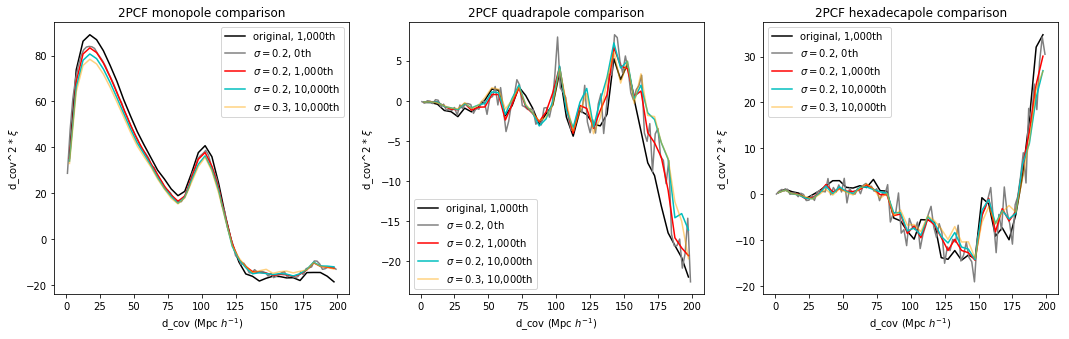

In [83]:
fig=plt.figure(figsize=(18,5))
for i,j,name in zip(['col2','col3','col4'],range(3),['monopole','quadrapole','hexadecapole']):
    ax = plt.subplot2grid((1,3),(0,j))
    ax.plot(org['col1'],org['col1']**2*org[i],c='k',label='original, 1,000th')
    #ax.plot(org['col1'],org['col1']**2*org[i],'purple',label='original, 10,000th')
    ax.plot(scat1['col1'],scat1['col1']**2*scat1[i],c='grey',label='$\sigma=0.2$, 0th')
    ax.plot(scat['col1'],scat['col1']**2*scat[i],c='r',label='$\sigma=0.2$, 1,000th')
    ax.plot(scat2['col1'],scat2['col1']**2*scat2[i],c='c',label='$\sigma=0.2$, 10,000th')
    ax.plot(scat3['col1'],scat2['col1']**2*scat3[i],c='orange',alpha=0.5,label='$\sigma=0.3$, 10,000th')
    
    plt.legend(loc=0)
    plt.xlabel('d_cov (Mpc $h^{-1}$)')
    plt.ylabel('d_cov^2 * $\\xi$')
    plt.title('2PCF '+name+' comparison')
plt.savefig(cfpath+'ELG2pcf.png',bbox_tight=True)

In the two-point correlation function monopole plot, the ELG catalogues are systematically smaller than the original catalogue for positive values. It means that the galaxy bias is smaller than halo bias for ELGs. For quadrupole and hexadecapole, since we didn't include the redshift space disturtion, so in principle they should be 0. 

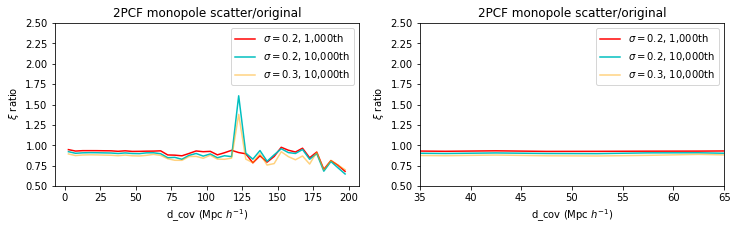

In [79]:
fig=plt.figure(figsize=(12,3))
for i in range(2):
    ax = plt.subplot2grid((1,2),(0,i))
    ax.plot(scat['col1'],scat['col2']/org['col2'],c='r',label='$\sigma=0.2$, 1,000th')
    ax.plot(scat2['col1'],scat2['col2']/org1['col2'],c='c',label='$\sigma=0.2$, 10,000th')
    ax.plot(scat3['col1'],scat3['col2']/org1['col2'],c='orange',alpha=0.5,label='$\sigma=0.3$, 10,000th')
    
    plt.legend(loc=0)
    plt.xlabel('d_cov (Mpc $h^{-1}$)')
    plt.ylabel(' $\\xi$ ratio')
    plt.title('2PCF monopole scatter/original')
    if i==1:
        plt.xlim(35,65);
    plt.ylim(0.5,2.5)


The halo bias $b_{h}$ satisfies $\delta_{h}=b_{h}\delta_{dm}$ and the galaxy bias $b_{g}$ satisfies $\delta_{g}=b_{g}\delta_{dm}$. This means that the correlation function of haloes $\xi_{h}=b_h^2\xi_{dm}$ and galaxies $\xi_{g}=b_g^2\xi_{dm}$. In the first two plots above, we are comparing the $\frac{\xi_{g}}{\xi_{h}}=\frac{b_g^2}{b_h^2}$ for different $\sigma_{HAM}$ and starting data in different distance. Picking a relatively large scale 40-60 Mpc $h^{-1}$, we could see that smaller starting data or smaller $\sigma_{HAM}$ could produce higher galaxy bias. 